In [2]:
%load_ext autoreload
%autoreload 2


In [5]:
from netopt import netopt, print_dict, plot_map
#from network_optimization import optimal_location, optimal_location_service_level, print_dict, plot
from scenario_5 import warehouses, customers, distance
# scenario_4 is like scenario_1 with  capacities
from data_structures import import_data, set_capacity, set_all_capacities, set_fixed_cost, calculate_dm

In [ ]:
plot_map(warehouses=warehouses,
         customers=customers,
         warehouse_markersize=5,
         warehouse_marker='s',
         warehouse_markercolor='red',
         customer_markersize=3,
         customer_marker='x',
         customer_markercolor='blue')

In [ ]:
results = netopt(num_warehouses=3,
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 objective='mindistance',
                 #distance_ranges=[0, 100, 400, 800, 1200],
                 high_service_distance=None,
                 avg_service_distance=None,
                 max_service_distance=None,
                 force_single_sourcing=True,
                 force_uncapacitated=False,
                 #forced_open=[164, 19, 147, 94, 5],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8)
print_dict(results)

In [ ]:
set_all_capacities(warehouses, 30_000_000)

In [ ]:
set_capacity(warehouses, 5, 40_000_000)

In [ ]:
data = ["A;10;10;1000", "B;20;100;2000", "C;50;10;-1"]




In [ ]:
import_csv(data)


In [ ]:
a = reader(data)

In [ ]:

from netopt import netopt, print_dict, plot_map
#from network_optimization import optimal_location, optimal_location_service_level, print_dict, plot
from scenario_5 import warehouses, customers, distance
# scenario_4 is like scenario_1 with  capacities
from data_structures import import_data, calculate_dm, show_data, set_capacity, set_all_capacities
from data_structures import Customer as C, Warehouse as W

In [ ]:
whs_1 = ["A;10;10;1000", "B;10;100;2000", "C;50;10;-1", "D;100;20;1000"]
cst_1 = ["1;70;40;1000", "2;40;80;2000", "3;90;10;1000"]

whs = import_data(whs_1, 'warehouse')
cst = import_data(cst_1, 'customer')
dist = calculate_dm(warehouses=whs,
                    customers=cst)

In [ ]:
show_data(whs)

In [ ]:
set_fixed_cost(warehouses=whs, w_id=0, fixed_cost=1000)
set_capacity(warehouses=whs, w_id=0, capacity=600)

In [ ]:
plot_map(warehouses=whs,
         customers=cst,
         warehouse_markersize=5,
         warehouse_marker='s',
         warehouse_markercolor='red',
         customer_markersize=3,
         customer_marker='x',
         customer_markercolor='blue')

In [ ]:
results = netopt(num_warehouses=4,
                 warehouses=whs,
                 customers=cst,
                 distance=dist,
                 objective='mindistance',
                 distance_ranges=[0, 100, 400, 800, 1200],
                 high_service_distance=None,
                 avg_service_distance=None,
                 max_service_distance=None,
                 force_single_sourcing=False,
                 force_uncapacitated=False,
                 #force_allocations=[(0, 0), (1, 1), (2, 2)],
                 #force_open=[164, 19, 147, 94, 5],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8,
                 hide_inactive=True)
print_dict(results)

In [ ]:
set_capacity(whs, 4, 10_000_000)

In [ ]:
list(a)


In [ ]:
show_data(whs)

In [ ]:
data_cst = ["Rome;41.8931;12.4828;2872800",
"Milan;45.4669;9.19;1366180",
"Turin;45.0667;7.7;870952",
"Genoa;44.4072;8.934;580097",
"Bologna;44.4939;11.3428;389261",
"Florence;43.7714;11.2542;380948",
"Venice;45.4397;12.3319;261321",
"Verona;45.4386;10.9928;257275",
"Padova;45.4064;11.8778;210440",
"Trieste;45.6503;13.7703;204338",
"Brescia;45.5389;10.2203;196745",
"Parma;44.8015;10.328;195687",
"Prato;43.8808;11.0966;193325",
"Modena;44.6458;10.9257;185273",
"Reggio Emilia;44.7;10.6333;171944",
"Ravenna;44.4178;12.1994;159115",
"Livorno;43.55;10.3167;158371",
"Rimini;44.0594;12.5683;149403",
"Ferrara;44.8353;11.6199;132278",
"Monza;45.5836;9.2736;123598",
"Bergamo;45.695;9.67;120923",
"Trento;46.0667;11.1167;117997",
"Forlì;44.2225;12.0408;117863",
"Vicenza;45.55;11.55;111620",
"Bolzano;46.5;11.35;107317",
"Novara;45.45;8.6167;104183",
"Piacenza;45.05;9.7;103082",
"Udine;46.0667;13.2333;99518",
"Arezzo;43.4631;11.8781;99419",
"Cesena;44.1333;12.2333;96760",
"Pesaro;43.9102;12.9133;94958",
"Alessandria;44.9133;8.62;93980",
"La Spezia;44.108;9.8289;93311",
"Pistoia;43.9333;10.9167;90195",
"Pisa;43.7167;10.4;90118",
"Mestre;45.4906;12.2381;89376",
"Lucca;43.85;10.5167;89243",
"Treviso;45.6722;12.2422;84954",
"Busto Arsizio;45.612;8.8518;83405",
"Como;45.8103;9.0861;83320",
"Sesto San Giovanni;45.5333;9.2333;81773",
"Varese;45.8167;8.8333;80544",
"Fiumicino;41.7667;12.2333;79630",
"Asti;44.9;8.2069;76211",
"Cinisello Balsamo;45.55;9.2167;75723",
"Pavia;45.1853;9.155;72773",
"Cremona;45.1333;10.0333;72077",
"Carpi;44.7833;10.885;71148",
"Imola;44.3531;11.7147;69936",
"Vigevano;45.3167;8.8667;63153",
"Carrara;44.0833;10.1;62537",
"Viareggio;43.8672;10.2506;62079",
"Savona;44.308;8.481;60632",
"Legnano;45.5781;8.9183;60177",
"Faenza;44.2856;11.8833;58797",
"Cerignola;41.2667;15.9;58540",
"Moncalieri;45;7.6833;57234",
"Foligno;42.9561;12.7033;56999",
"Cuneo;44.3833;7.55;56281",
"Modica;36.8672;14.7614;54530",
"San Remo;43.8175;7.775;54529",
"Siena;43.3183;11.3314;53901",
"Gallarate;45.6649;8.7914;53425",
"Rovigo;45.0809;11.794;51149",
"Pordenone;45.9626;12.6563;51127",
"Rho;45.5333;9.0333;50904",
"Scandicci;43.7544;11.1894;50645",
"Ardea;41.6167;12.55;49663",
"Collegno;45.0833;7.5833;49597",
"Chioggia;45.2189;12.2785;49430",
"Mantova;45.1564;10.7911;49409",
"Sesto Fiorentino;43.8333;11.2;49091",
"Ascoli Piceno;42.8547;13.5753;48773",
"Rivoli;45.0725;7.5272;48629",
"Empoli;43.7167;10.95;48626",
"Lecco;45.85;9.4;48177",
"Cologno Monzese;45.5286;9.2783;47720",
"Settimo Torinese;45.1333;7.7667;47220",
"Paderno Dugnano;45.5667;9.1667;46701",
"Vercelli;45.3167;8.4167;46181",
"Lissone;45.6167;9.25;45535",
"Lodi;45.3167;9.5;45252",
"Seregno;45.65;9.2;45131",
"Biella;45.5664;8.0533;44324",
"Bassano del Grappa;45.7686;11.7367;43481",
"Rozzano;45.3833;9.15;42442",
"Imperia;43.8865;8.0297;42318",
"Desio;45.6167;9.2167;42079",
"San Donà di Piave;45.6298;12.5641;41794",
"Sassuolo;44.5517;10.7856;40826",
"Merano;46.6689;11.1639;40485",
]
cst = import_data(data_cst, 'customer')

In [ ]:
data_cst = ["Rome;41.8931;12.4828;2872800",
"Milan;45.4669;9.19;1366180",
"Naples;40.8333;14.25;966144",
"Turin;45.0667;7.7;870952",
"Palermo;38.1157;13.3613;668405",
"Genoa;44.4072;8.934;580097",
"Bologna;44.4939;11.3428;389261",
"Florence;43.7714;11.2542;380948",
"Bari;41.1253;16.8667;323370",
"Catania;37.5027;15.0873;311584",
"Venice;45.4397;12.3319;261321",
"Verona;45.4386;10.9928;257275",
"Messina;38.1936;15.5542;234293",
"Padova;45.4064;11.8778;210440",
"Trieste;45.6503;13.7703;204338",
"Taranto;40.4181;17.2408;198283",
"Brescia;45.5389;10.2203;196745"]
x = """
"Parma;44.8015;10.328;195687",
"Prato;43.8808;11.0966;193325",
"Modena;44.6458;10.9257;185273",
"Reggio di Calabria;38.1144;15.65;181447",
"Reggio Emilia;44.7;10.6333;171944",
"Perugia;43.1121;12.3888;165683",
"Ravenna;44.4178;12.1994;159115",
"Livorno;43.55;10.3167;158371",
"Cagliari;39.2167;9.1167;154106",
"Foggia;41.4584;15.5519;151372",
"Rimini;44.0594;12.5683;149403",
"Salerno;40.6806;14.7597;133970",
"Ferrara;44.8353;11.6199;132278",
"Latina;41.4676;12.9037;126470",
"Giugliano in Campania;40.9319;14.1956;124361",
"Monza;45.5836;9.2736;123598",
"Siracusa;37.0692;15.2875;121171",
"Bergamo;45.695;9.67;120923",
"Pescara;42.4643;14.2142;119217",
"Trento;46.0667;11.1167;117997",
"Forlì;44.2225;12.0408;117863",
"Sassari;40.7267;8.5592;116641",
"Vicenza;45.55;11.55;111620",
"Terni;42.5667;12.65;111189",
"Bolzano;46.5;11.35;107317",
"Novara;45.45;8.6167;104183",
"Piacenza;45.05;9.7;103082",
"Ancona;43.6167;13.5167;100924",
"Andria;41.2317;16.3083;99857",
"Udine;46.0667;13.2333;99518",
"Arezzo;43.4631;11.8781;99419",
"Cesena;44.1333;12.2333;96760",
"Lecce;40.352;18.1691;95441",
"Pesaro;43.9102;12.9133;94958",
"Barletta;41.3167;16.2833;94477",
"Alessandria;44.9133;8.62;93980",
"La Spezia;44.108;9.8289;93311",
"Pistoia;43.9333;10.9167;90195",
"Pisa;43.7167;10.4;90118",
"Catanzaro;38.91;16.5875;89718",
"Mestre;45.4906;12.2381;89376",
"Lucca;43.85;10.5167;89243",
"Brindisi;40.6383;17.9458;87141",
"Torre del Greco;40.7853;14.3953;85332",
"Treviso;45.6722;12.2422;84954",
"Busto Arsizio;45.612;8.8518;83405",
"Como;45.8103;9.0861;83320",
"Marsala;37.7981;12.4342;82802",
"Grosseto;42.7722;11.1089;82036",
"Sesto San Giovanni;45.5333;9.2333;81773",
"Pozzuoli;40.8231;14.1222;81141",
"Varese;45.8167;8.8333;80544",
"Fiumicino;41.7667;12.2333;79630",
"Casoria;40.9;14.3;77087",
"Asti;44.9;8.2069;76211",
"Cinisello Balsamo;45.55;9.2167;75723",
"Caserta;41.0667;14.3333;75561",
"Gela;37.0667;14.25;74858",
"Ragusa;36.925;14.7306;73638",
"Pavia;45.1853;9.155;72773",
"Cremona;45.1333;10.0333;72077",
"Carpi;44.7833;10.885;71148",
"Quartu Sant’Elena;39.2291;9.2649;70879",
"Altamura;40.8167;16.55;70514",
"Imola;44.3531;11.7147;69936",
"L’Aquila;42.354;13.392;69439",
"Massa;44.0333;10.1333;69037",
"Trapani;38.0175;12.515;67923",
"Viterbo;42.4186;12.1042;67798",
"Cosenza;39.3;16.25;67239",
"Potenza;40.6333;15.8;67211",
"Castellammare di Stabia;40.7;14.4833;65922",
"Afragola;40.9167;14.3167;64817",
"Vittoria;36.95;14.5333;64212",
"Crotone;39.0833;17.1167;63941",
"Pomezia;41.6693;12.5021;63641",
"Vigevano;45.3167;8.8667;63153",
"Carrara;44.0833;10.1;62537",
"Caltanissetta;37.4915;14.0624;62317",
"Viareggio;43.8672;10.2506;62079",
"Benevento;41.1256;14.7811;61791",
"Fano;43.8435;13.0198;60978",
"Savona;44.308;8.481;60632",
"Matera;40.6667;16.6;60403",
"Olbia;40.9167;9.5;60261",
"Legnano;45.5781;8.9183;60177",
"Acerra;40.95;14.3667;59910",
"Marano di Napoli;40.9;14.1833;59862",
"Molfetta;41.2;16.6;59470",
"Agrigento;37.3111;13.5765;59329",
"Faenza;44.2856;11.8833;58797",
"Cerignola;41.2667;15.9;58540",
"Moncalieri;45;7.6833;57234",
"Foligno;42.9561;12.7033;56999",
"Manfredonia;41.6333;15.9167;56906",
"Tivoli;41.9667;12.8;56542",
"Cuneo;44.3833;7.55;56281",
"Trani;41.2667;16.4167;56031",
"Bisceglie;41.2409;16.5021;55385",
"Bitonto;41.1083;16.6917;55127",
"Bagheria;38.0833;13.5;55047",
"Portici;40.8197;14.3411;54577",
"Modica;36.8672;14.7614;54530",
"San Remo;43.8175;7.775;54529",
"Teramo;42.6589;13.7039;54338",
"Montesilvano;42.5119;14.1373;54194",
"Avellino;40.9153;14.7897;53908",
"Siena;43.3183;11.3314;53901",
"Gallarate;45.6649;8.7914;53425",
"Velletri;41.6667;12.7833;53188",
"Cava de’ Tirreni;40.7008;14.7056;53130",
"San Severo;41.6951;15.3793;53015",
"Aversa;40.973;14.2065;52794",
"Ercolano;40.8068;14.3526;52763",
"Anzio;41.4472;12.6283;52381",
"Acireale;37.6125;15.1656;52269",
"Civitavecchia;42.1;11.8;51595",
"Mazara del Vallo;37.6517;12.5875;51488",
"Rovigo;45.0809;11.794;51149",
"Pordenone;45.9626;12.6563;51127",
"Battipaglia;40.6167;14.9833;51005",
"Rho;45.5333;9.0333;50904",
"Chieti;42.3511;14.1674;50770",
"Scafati;40.7536;14.5253;50686",
"Scandicci;43.7544;11.1894;50645",
"Misterbianco;37.5183;15.0069;49992",
"Nettuno;41.4667;12.6667;49852",
"Ardea;41.6167;12.55;49663",
"Collegno;45.0833;7.5833;49597",
"Chioggia;45.2189;12.2785;49430",
"Mantova;45.1564;10.7911;49409",
"Campobasso;41.561;14.6684;49262",
"Casalnuovo di Napoli;40.9167;14.35;49250",
"Sesto Fiorentino;43.8333;11.2;49091",
"Monopoli;40.95;17.3;48964",
"Martina Franca;40.7;17.3333;48786",
"Ascoli Piceno;42.8547;13.5753;48773",
"Rivoli;45.0725;7.5272;48629",
"Empoli;43.7167;10.95;48626",
"Corato;41.15;16.4;48262",
"Lecco;45.85;9.4;48177",
"Paterno;37.5667;14.9;47827",
"Nichelino;45;7.65;47721",
"Cologno Monzese;45.5286;9.2783;47720",
"Rieti;42.4044;12.8567;47436",
"San Benedetto del Tronto;42.9438;13.8833;47351",
"Settimo Torinese;45.1333;7.7667;47220",
"Paderno Dugnano;45.5667;9.1667;46701",
"Campi Bisenzio;43.8256;11.1333;46696",
"Terracina;41.2833;13.25;46323",
"Vercelli;45.3167;8.4167;46181",
"Capannori;43.8756;10.5736;46072",
"Frosinone;41.6333;13.35;46063",
"Nocera Inferiore;40.75;14.6333;45784",
"Lissone;45.6167;9.25;45535",
"Alcamo;37.9667;12.9667;45273",
"Lodi;45.3167;9.5;45252",
"Cascina;43.68;10.5003;45212",
"Seregno;45.65;9.2;45131",
"San Giorgio a Cremano;40.8333;14.3333;45122",
"Senigallia;43.7131;13.2183;44616",
"Marino;41.7667;12.6667;44472",
"Biella;45.5664;8.0533;44324",
"Alghero;40.56;8.315;43964",
"Gravina in Puglia;40.8206;16.4233;43816",
"Bassano del Grappa;45.7686;11.7367;43481",
"Rozzano;45.3833;9.15;42442",
"Torre Annunziata;40.7569;14.4444;42406",
"Civitanova Marche;43.3068;13.7286;42353",
"Imperia;43.8865;8.0297;42318",
"Avezzano;42.031;13.4264;42276",
"Desio;45.6167;9.2167;42079",
"San Donà di Piave;45.6298;12.5641;41794",
"Macerata;43.3003;13.4533;41776",
"Ladispoli;41.9544;12.0742;41604",
"Barcellona-Pozzo di Gotto;38.15;15.2167;41389",
"Albano Laziale;41.7333;12.6667;41314",
"Monterotondo;42.05;12.6167;41144",
"Sassuolo;44.5517;10.7856;40826",
"Sciacca;37.5092;13.0889;40488",
"Merano;46.6689;11.1639;40485",
"Corigliano Calabro;39.6;16.5167;40478",
"""
cst = import_data(data_cst, 'customer')
show_data(cst)

In [ ]:
# latitude = y
# longitude = x

data_whs = ["Rovereto;45.8833;11.0342;39825",
"Carmagnola;44.85;7.7167;28969;0",
"Ginosa;40.5;16.75;22430;0",
"Silvi Paese;42.55;14.1167;15708;0",
"Mondolfo;43.7517;13.0956;14265;0",
"Fisciano;40.7667;14.8;13967;0",
"Cassina de’ Pecchi;45.5167;9.3667;13849;0",
"San Gregorio di Catania;37.5667;15.1167;11880;0",
"Portomaggiore;44.7;11.8;11630;0",]

x = """            "Quinto di Treviso;45.65;12.1667;9912",
"Castelnuovo Berardenga;43.3472;11.5042;9086",
"Gatteo;44.1;12.3833;8988",
"Laveno-Mombello;45.9089;8.6204;8684",
"Campomarino;41.9567;15.0344;8074",
"Campofelice di Roccella;37.9833;13.8833;7516",
"Varallo;45.8138;8.2581;7146",
"Fossò;45.3833;12.05;7041",
"Borgo a Mozzano;43.9797;10.5467;6994",
"Saltara;43.7534;12.8976;6966",
"Quinto Vicentino;45.5667;11.6167;5815",
"Ceva;44.3833;8.0333;5774",
"San Dorligo della Valle;45.6225;13.8578;5754",
"Misinto;45.6667;9.0833;5576",
"Spadafora;38.2333;15.3833;4983",
"San Martino in Pensilis;41.8667;15.0167;4752",
"Ormelle;45.7803;12.4197;4486",
"Montecchia di Crosara;45.4833;11.25;4325",
"Grisignano di Zocco;45.4833;11.7;4293",
"Canale Monterano;42.1333;12.1;4165",
"Stigliano;40.4;16.2333;4112",
"Citerna;43.5;12.1167;3463",
"Camporeale;37.9;13.1;3238",
"Sarmede;45.9775;12.3853;3061",
"San Nicolò d’Arcidano;39.6835;8.6466;2630",
"Pieve Fosciana;44.1328;10.4119;2484","""

whs = import_data(data_whs, 'warehouse')
show_data(whs)

In [ ]:
plot_map(warehouses=whs,
         customers=cst)

In [ ]:
dist = calculate_dm(warehouses=whs,
                    customers=cst)

In [ ]:
results = netopt(num_warehouses=2,
                 warehouses=whs,
                 customers=cst,
                 distance=dist,
                 objective='mindistance',
                 distance_ranges=[0, 100, 400, 800, 1200],
                 high_service_distance=None,
                 avg_service_distance=None,
                 max_service_distance=None,
                 force_single_sourcing=False,
                 force_uncapacitated=True,
                 #force_allocations=[(0, 0), (1, 1), (2, 2)],
                 force_open=[7],
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8,
                 hide_inactive=True)
print_dict(results)

In [ ]:

from netopt import netopt, print_dict, plot_map, set_capacity, set_all_capacities
#from network_optimization import optimal_location, optimal_location_service_level, print_dict, plot
from scenario_5 import warehouses, customers, distance
# scenario_4 is like scenario_1 with  capacities
from data_structures import import_data, calculate_dm, show_data

In [ ]:
cst

In [ ]:
cap = sum([int(x.capacity) for _, x in whs.items()])
dem = sum([int(x.demand) for _, x in cst.items()])

In [ ]:
show_data(cst)

In [ ]:
dem / 4

In [ ]:
infl = lambda x: x * 2

In [ ]:
set_all_capacities(whs, None)

In [ ]:
import pandas as pd

In [ ]:
cities = pd.read_excel('../locatios_cities_it.xlsx')

In [ ]:
cities[cities['city'] =='Bologna' ]

In [ ]:
# Customers as-is
lst = []
for index, row in cities[(cities['lat'] >= 44.40571389901116) & (cities['population'] > 75000)].iterrows():
    lst.append(f"{row.city};{row.lat};{row.lng};{int(round(row.population / 1000, 0))}")
print(lst)

In [ ]:
# Customers to-be

for index, row in cities[(cities['lat'] < 44.40571389901116) & (cities['population'] > 75000)].iterrows():
    lst.append(f"{row.city};{row.lat};{row.lng};{int(round(row.population / 1000, 0))}")
print(lst)

In [ ]:
# Candidate warehouse
whs_list = []
for index, row in cities[(cities['population'] > 250000)].iterrows():
    whs_list.append(f"{row.city};{row.lat};{row.lng};{int(round(row.population / 1000, 0))}")
print(whs_list)

In [ ]:
cities[(cities['population'] > 250000)].shape

In [ ]:
customers_as_is = ['Milan;45.4669;9.19;1366180', 'Turin;45.0667;7.7;870952', 'Genoa;44.4072;8.934;580097', 'Bologna;44.4939;11.3428;389261', 'Venice;45.4397;12.3319;261321', 'Verona;45.4386;10.9928;257275', 'Padova;45.4064;11.8778;210440', 'Trieste;45.6503;13.7703;204338', 'Brescia;45.5389;10.2203;196745', 'Parma;44.8015;10.328;195687', 'Modena;44.6458;10.9257;185273', 'Reggio Emilia;44.7;10.6333;171944', 'Ravenna;44.4178;12.1994;159115', 'Ferrara;44.8353;11.6199;132278', 'Monza;45.5836;9.2736;123598', 'Bergamo;45.695;9.67;120923', 'Trento;46.0667;11.1167;117997', 'Vicenza;45.55;11.55;111620', 'Bolzano;46.5;11.35;107317', 'Novara;45.45;8.6167;104183', 'Piacenza;45.05;9.7;103082', 'Udine;46.0667;13.2333;99518', 'Alessandria;44.9133;8.62;93980', 'Mestre;45.4906;12.2381;89376', 'Treviso;45.6722;12.2422;84954', 'Busto Arsizio;45.612;8.8518;83405', 'Como;45.8103;9.0861;83320', 'Sesto San Giovanni;45.5333;9.2333;81773', 'Varese;45.8167;8.8333;80544', 'Asti;44.9;8.2069;76211', 'Cinisello Balsamo;45.55;9.2167;75723']
customers_to_be = ['Milan;45.4669;9.19;1366180', 'Turin;45.0667;7.7;870952', 'Genoa;44.4072;8.934;580097', 'Bologna;44.4939;11.3428;389261', 'Venice;45.4397;12.3319;261321', 'Verona;45.4386;10.9928;257275', 'Padova;45.4064;11.8778;210440', 'Trieste;45.6503;13.7703;204338', 'Brescia;45.5389;10.2203;196745', 'Parma;44.8015;10.328;195687', 'Modena;44.6458;10.9257;185273', 'Reggio Emilia;44.7;10.6333;171944', 'Ravenna;44.4178;12.1994;159115', 'Ferrara;44.8353;11.6199;132278', 'Monza;45.5836;9.2736;123598', 'Bergamo;45.695;9.67;120923', 'Trento;46.0667;11.1167;117997', 'Vicenza;45.55;11.55;111620', 'Bolzano;46.5;11.35;107317', 'Novara;45.45;8.6167;104183', 'Piacenza;45.05;9.7;103082', 'Udine;46.0667;13.2333;99518', 'Alessandria;44.9133;8.62;93980', 'Mestre;45.4906;12.2381;89376', 'Treviso;45.6722;12.2422;84954', 'Busto Arsizio;45.612;8.8518;83405', 'Como;45.8103;9.0861;83320', 'Sesto San Giovanni;45.5333;9.2333;81773', 'Varese;45.8167;8.8333;80544', 'Asti;44.9;8.2069;76211', 'Cinisello Balsamo;45.55;9.2167;75723', 'Rome;41.8931;12.4828;2872800', 'Naples;40.8333;14.25;966144', 'Palermo;38.1157;13.3613;668405', 'Florence;43.7714;11.2542;380948', 'Bari;41.1253;16.8667;323370', 'Catania;37.5027;15.0873;311584', 'Messina;38.1936;15.5542;234293', 'Taranto;40.4181;17.2408;198283', 'Prato;43.8808;11.0966;193325', 'Reggio di Calabria;38.1144;15.65;181447', 'Perugia;43.1121;12.3888;165683', 'Livorno;43.55;10.3167;158371', 'Cagliari;39.2167;9.1167;154106', 'Foggia;41.4584;15.5519;151372', 'Rimini;44.0594;12.5683;149403', 'Salerno;40.6806;14.7597;133970', 'Latina;41.4676;12.9037;126470', 'Giugliano in Campania;40.9319;14.1956;124361', 'Siracusa;37.0692;15.2875;121171', 'Pescara;42.4643;14.2142;119217', 'Forlì;44.2225;12.0408;117863', 'Sassari;40.7267;8.5592;116641', 'Terni;42.5667;12.65;111189', 'Ancona;43.6167;13.5167;100924', 'Andria;41.2317;16.3083;99857', 'Arezzo;43.4631;11.8781;99419', 'Cesena;44.1333;12.2333;96760', 'Lecce;40.352;18.1691;95441', 'Pesaro;43.9102;12.9133;94958', 'Barletta;41.3167;16.2833;94477', 'La Spezia;44.108;9.8289;93311', 'Pistoia;43.9333;10.9167;90195', 'Pisa;43.7167;10.4;90118', 'Catanzaro;38.91;16.5875;89718', 'Lucca;43.85;10.5167;89243', 'Brindisi;40.6383;17.9458;87141', 'Torre del Greco;40.7853;14.3953;85332', 'Marsala;37.7981;12.4342;82802', 'Grosseto;42.7722;11.1089;82036', 'Pozzuoli;40.8231;14.1222;81141', 'Fiumicino;41.7667;12.2333;79630', 'Casoria;40.9;14.3;77087', 'Caserta;41.0667;14.3333;75561']
warehouses = ['Rome;41.8931;12.4828;2872800', 'Milan;45.4669;9.19;1366180', 'Naples;40.8333;14.25;966144', 'Turin;45.0667;7.7;870952', 'Palermo;38.1157;13.3613;668405', 'Genoa;44.4072;8.934;580097', 'Bologna;44.4939;11.3428;389261', 'Florence;43.7714;11.2542;380948', 'Bari;41.1253;16.8667;323370', 'Catania;37.5027;15.0873;311584', 'Venice;45.4397;12.3319;261321', 'Verona;45.4386;10.9928;257275']
cst_as_is = import_data(customers_as_is, 'customer')
cst_to_be = import_data(customers_to_be, 'customer')
whs = import_data(whs_list, 'warehouse')


In [ ]:
cst_as_is


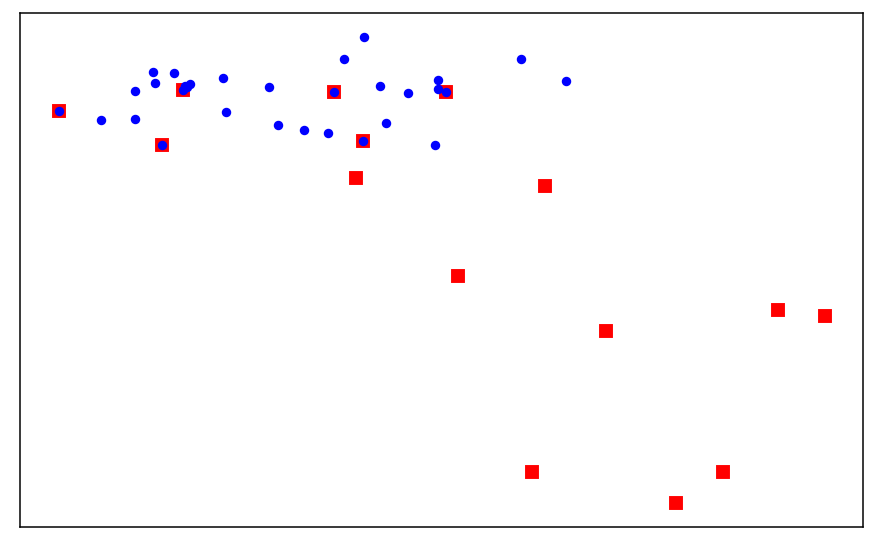

In [32]:
from projectwork_data import warehouses, customers_as_is, customers_to_be
from data_structures import show_data
from netopt import netopt
plot_map(warehouses=warehouses,
         customers=customers_as_is,
         warehouse_markersize=6)
dist = calculate_dm(warehouses=warehouses,
                    customers=customers_to_be)

In [33]:
show_data(warehouses)

|    |   Id | Identifier         | City               | State   | Zipcode   |   Latitude |   Longitude |   Capacity |   Fixed cost |
|---:|-----:|:-------------------|:-------------------|:--------|:----------|-----------:|------------:|-----------:|-------------:|
|  0 |    0 | Rome               | Rome               |         |           |    41.8931 |     12.4828 |      12000 |            0 |
|  1 |    1 | Milan              | Milan              |         |           |    45.4669 |      9.19   |      12000 |            0 |
|  2 |    2 | Naples             | Naples             |         |           |    40.8333 |     14.25   |      12000 |            0 |
|  3 |    3 | Turin              | Turin              |         |           |    45.0667 |      7.7    |      11000 |            0 |
|  4 |    4 | Palermo            | Palermo            |         |           |    38.1157 |     13.3613 |      10000 |            0 |
|  5 |    5 | Genoa              | Genoa              |         |    

CHECK INPUTS...OK
BUILD MODEL...Forcing open warehouses: [6]
OK
SOLVE...OK
Optimization Status  Optimal
Total transportation cost: 151960.0

Open warehouses:
ID:   6 City: Bologna              State:        Num. customers:  31  Outflow:      6817.0 units

Total outflow: 6817.0 units
% of demand in range     0 -   100: 15.2
% of demand in range   100 -   400: 72.0
% of demand in range   400 -   800: 12.8
% of demand in range   800 -  1200: 0.0
% of demand in range  1200 - 99999: 0.0
Most distant customer is at 409.90128569018134
Average customers distance (no weights): 204.98914479510083


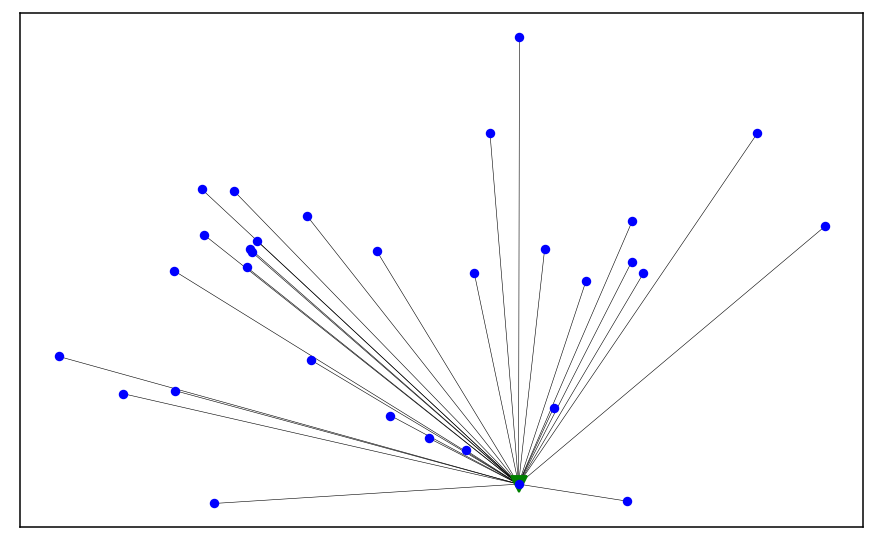

{   'active_warehouses_id': {6},
    'active_warehouses_name': ['Bologna'],
    'avg_customer_distance': 204.98914479510083,
    'avg_weighted_distance': 222.9126744280068,
    'demand_perc_by_ranges': {   (0, 100): 0.15211970074812967,
                                 (100, 400): 0.7201114859909051,
                                 (400, 800): 0.12776881326096523,
                                 (800, 1200): 0.0,
                                 (1200, 99999): 0.0},
    'most_distant_customer': 409.90128569018134,
    'multi_sourced_customers': [],
    'objective_value': 151959.5701575722}


In [35]:
results = netopt(num_warehouses=1,
                 warehouses=warehouses,
                 customers=customers_as_is,
                 distance=dist,
                 objective='mincost',
                 distance_ranges=[0, 100, 400, 800, 1200],
                 high_service_distance=None,
                 avg_service_distance=None,
                 max_service_distance=None,
                 force_single_sourcing=False,
                 force_uncapacitated=False,
                 force_allocations=[],
                 force_open=[6],
                 ignore_fixed_cost=False,
                 plot=True,
                 warehouse_markersize=5,
                 warehouse_active_markersize=8,
                 unit_transport_cost=0.1,
                 hide_inactive=True)
print_dict(results)

In [ ]:
set_fixed_cost(warehouses=warehouses, fixed_cost=10000000, w_id=6)

In [ ]:
show_data(warehouses)

In [ ]:
customers_as_is

In [ ]:
customers_to_be

In [ ]:
show_data(customers_to_be)

In [10]:
warehouses


{0: Warehouse(name='Rome', city='Rome', state='', zipcode='', latitude=41.8931, longitude=12.4828, capacity=2873.0, fixed_cost=0.0),
 1: Warehouse(name='Milan', city='Milan', state='', zipcode='', latitude=45.4669, longitude=9.19, capacity=1366.0, fixed_cost=0.0),
 2: Warehouse(name='Naples', city='Naples', state='', zipcode='', latitude=40.8333, longitude=14.25, capacity=966.0, fixed_cost=0.0),
 3: Warehouse(name='Turin', city='Turin', state='', zipcode='', latitude=45.0667, longitude=7.7, capacity=871.0, fixed_cost=0.0),
 4: Warehouse(name='Palermo', city='Palermo', state='', zipcode='', latitude=38.1157, longitude=13.3613, capacity=668.0, fixed_cost=0.0),
 5: Warehouse(name='Genoa', city='Genoa', state='', zipcode='', latitude=44.4072, longitude=8.934, capacity=580.0, fixed_cost=0.0),
 6: Warehouse(name='Bologna', city='Bologna', state='', zipcode='', latitude=44.4939, longitude=11.3428, capacity=389.0, fixed_cost=0.0),
 7: Warehouse(name='Florence', city='Florence', state='', zipco

In [24]:
import pandas as pd
df = []
for k, v in warehouses.items():
    df.append([k] + list(v))
df = pd.DataFrame(df, columns=['Id', 'Identifier', 'City', 'State', 'Zipcode', 'Latitude', 'Longitude', 'Capacity', 'Fixed cost'])
df.drop(['State', 'Zipcode'], axis=1, inplace=True)
df.to_excel('CandidateLocations.xlsx')
df

,Id,Identifier,City,Latitude,Longitude,Capacity,Fixed cost
0,0,Rome,Rome,41.8931,12.4828,2873.0,0.0
1,1,Milan,Milan,45.4669,9.1900,1366.0,0.0
2,2,Naples,Naples,40.8333,14.2500,966.0,0.0
3,3,Turin,Turin,45.0667,7.7000,871.0,0.0
4,4,Palermo,Palermo,38.1157,13.3613,668.0,0.0
5,5,Genoa,Genoa,44.4072,8.9340,580.0,0.0
6,6,Bologna,Bologna,44.4939,11.3428,389.0,0.0
7,7,Florence,Florence,43.7714,11.2542,381.0,0.0
8,8,Bari,Bari,41.1253,16.8667,323.0,0.0
9,9,Catania,Catania,37.5027,15.0873,312.0,0.0
